In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

In [2]:
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims//1592110058-multiparam")

In [3]:
sensitivity_output.scn_params.keys()

dict_keys(['Nominal Student Parameters'])

In [4]:
sensitivity_output.varying_params

['expected_contacts_per_day', 'population_size']

In [67]:
np.quantile(np.array([0,1]), 0.5)

0.5

In [5]:
sensitivity_output.sim_results['Nominal Student Parameters'].keys()

dict_keys([(1.3, 500.0), (1.3, 1000.0), (1.3, 1500.0), (1.3, 2000.0), (1.3, 2500.0), (1.3, 3000.0), (1.3, 3500.0), (1.3, 4000.0), (1.3, 4500.0), (1.3, 5000.0), (1.3, 5500.0), (1.3, 6000.0), (1.3, 6500.0), (1.3, 7000.0), (1.3, 7500.0), (1.3, 8000.0), (1.3, 8500.0), (1.3, 9000.0), (1.3, 9500.0), (1.3, 10000.0), (1.8, 500.0), (1.8, 1000.0), (1.8, 1500.0), (1.8, 2000.0), (1.8, 2500.0), (1.8, 3000.0), (1.8, 3500.0), (1.8, 4000.0), (1.8, 4500.0), (1.8, 5000.0), (1.8, 5500.0), (1.8, 6000.0), (1.8, 6500.0), (1.8, 7000.0), (1.8, 7500.0), (1.8, 8000.0), (1.8, 8500.0), (1.8, 9000.0), (1.8, 9500.0), (1.8, 10000.0), (2.3, 500.0), (2.3, 1000.0), (2.3, 1500.0), (2.3, 2000.0), (2.3, 2500.0), (2.3, 3000.0), (2.3, 3500.0), (2.3, 4000.0), (2.3, 4500.0), (2.3, 5000.0), (2.3, 5500.0), (2.3, 6000.0), (2.3, 6500.0), (2.3, 7000.0), (2.3, 7500.0), (2.3, 8000.0), (2.3, 8500.0), (2.3, 9000.0), (2.3, 9500.0), (2.3, 10000.0), (2.8, 500.0), (2.8, 1000.0), (2.8, 1500.0), (2.8, 2000.0), (2.8, 2500.0), (2.8, 3000.0), 

In [69]:
sensitivity_output = sensitivity_output2

In [9]:
dfs = sensitivity_output.sim_results['Nominal Student Parameters'][(1.3, 500.0)]

In [11]:
len(dfs)

500

In [70]:
keys = sensitivity_output.sim_results['Nominal Student Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_popsize = sorted(list(set([x[1] for x in keys])))

In [71]:
import numpy as np

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for popsize in Y_popsize:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Student Parameters'][(contacts, popsize)]
        hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

In [14]:
len(X)

419

In [30]:
np.array(X_contacts).shape

(21,)

In [31]:
np.array(Y_popsize).shape

(20,)

In [33]:
np.array(Zs_hosp).T.shape

(20, 21)

<a list of 15 text.Text objects>

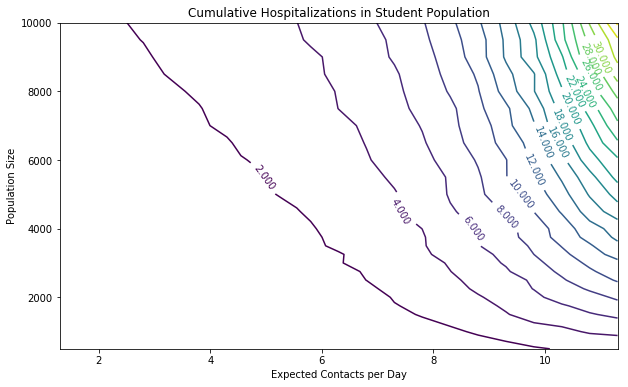

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Student Population")
plt.ylabel("Population Size")
plt.xlabel("Expected Contacts per Day")
CS = plt.contour(np.array(X_contacts),np.array(Y_popsize), np.array(Zs_hosp).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 15 text.Text objects>

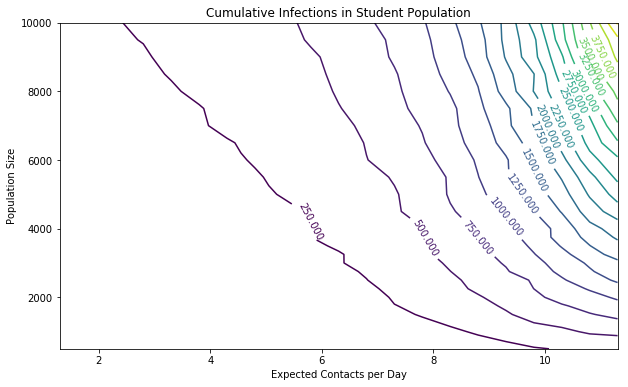

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Student Population")
plt.ylabel("Population Size")
plt.xlabel("Expected Contacts per Day")
CS = plt.contour(np.array(X_contacts),np.array(Y_popsize), np.array(Zs_inf).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 20 text.Text objects>

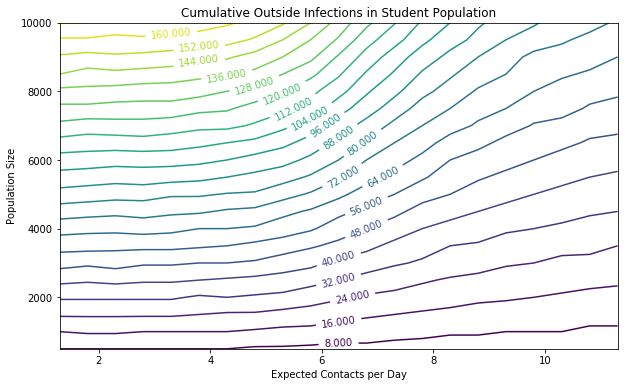

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Outside Infections in Student Population")
plt.ylabel("Population Size")
plt.xlabel("Expected Contacts per Day")
CS = plt.contour(np.array(X_contacts),np.array(Y_popsize), np.array(Zs_outside_inf).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
1592159950-multiparam

In [45]:
sensitivity_output2 = MultiParamOutputLoader("/nfs01/covid_sims//1592159950-multiparam")

In [74]:
keys = sensitivity_output2.sim_results['Nominal Student Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_popsize = [0] + sorted(list(set([x[1] for x in keys])))
#Y_popsize = sorted(list(set([x[1] for x in keys])))
import numpy as np

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum() + 12.6

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum() + 594.5

def get_cum_infections(df):
    
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum() + 594.5

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for popsize in Y_popsize:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        if popsize == 0:
            hosps, outside_infs, infs = 12.6, 594.5, 594.6
        else:
            dfs = sensitivity_output2.sim_results['Nominal Student Parameters'][(contacts , popsize)]
            hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

<a list of 16 text.Text objects>

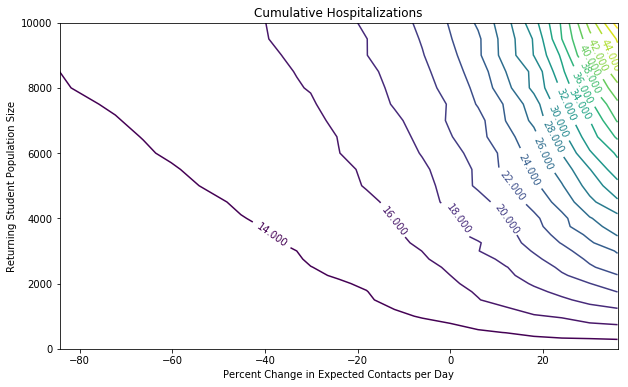

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations")
plt.ylabel("Returning Student Population Size")
plt.xlabel("Percent Change in Expected Contacts per Day")
CS = plt.contour(np.array([(x - 8.3) / 8.3 * 100 for x in X_contacts]),np.array(Y_popsize), np.array(Zs_hosp).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 15 text.Text objects>

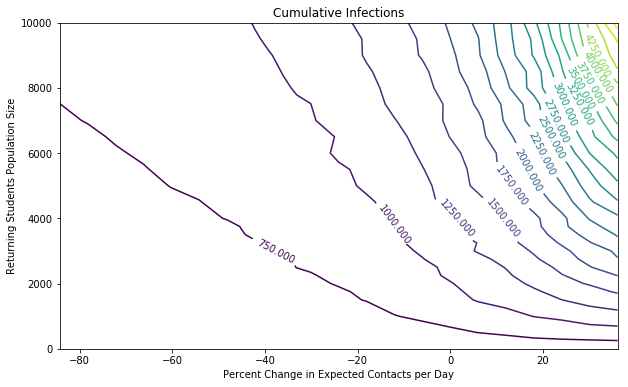

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections")
plt.ylabel("Returning Students Population Size")
plt.xlabel("Percent Change in Expected Contacts per Day")
CS = plt.contour(np.array([(x - 8.3) / 8.3 * 100 for x in X_contacts]),np.array(Y_popsize), np.array(Zs_inf).T, 20)
plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
/nfs01/covid_sims//1592252178-multiparam

In [68]:
sensitivity_output2 = MultiParamOutputLoader("/nfs01/covid_sims//1592252178-multiparam")